In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook',font_scale=1.2)
pd.set_option('display.max_columns',None)
from IPython.core.display import HTML,display

In [2]:
df=pd.read_excel("store.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
no_of_duplicates=df.duplicated().sum()
no_of_duplicates

0

In [4]:
no_of_nan_values=df.isna().sum().sum()
no_of_nan_values

0

In [5]:
#a) Derive basic statistics for store sales which is happening in the US market and frame inference
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#b) Graphical representation of Region wise sales split and make inference
geographic_feature_cols1=['Region','City','State']
geographic_feature_cols=['Region']
product_based_feature_cols=['Category', 'Sub-Category']
service_based_col=['Ship Mode']
customer_segment_col=['Segment']

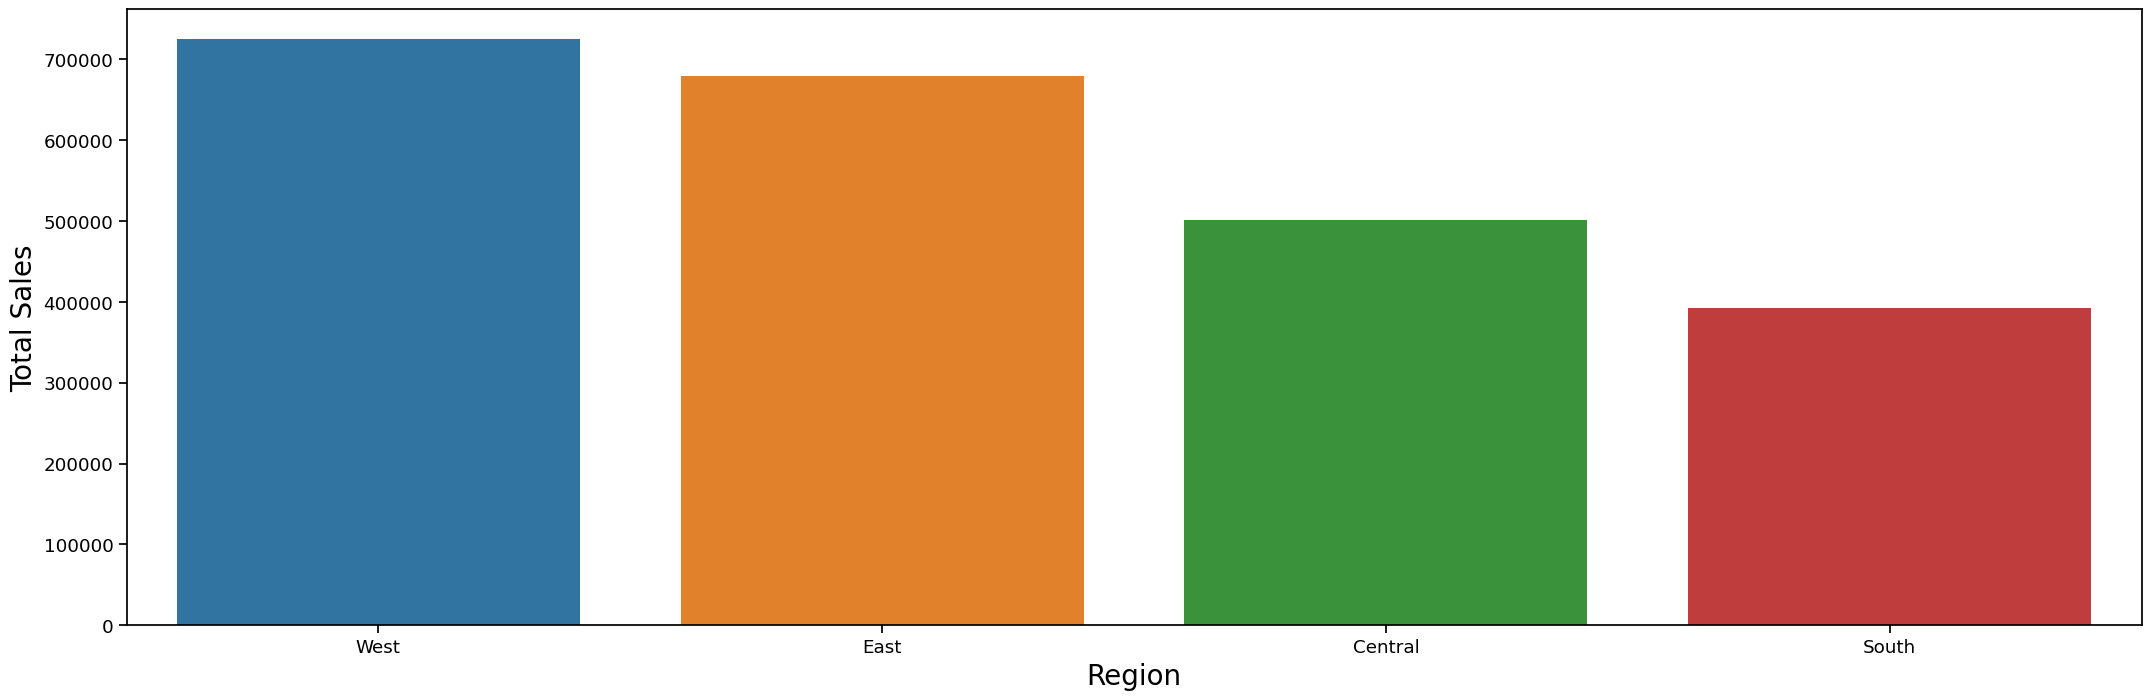

In [12]:
for criterion in ['Total']:
    text="<h2 style='color:#FF3355'><b>"+f"{criterion} Sales"+"</b></h2><hr>"
    display(HTML(text))    
    for col in geographic_feature_cols:
        if criterion == 'Total':
            temp=df.groupby(col)['Sales'].sum().reset_index()
        elif criterion == 'Median':
            temp=df.groupby(col)['Sales'].median().reset_index()
        else:
            temp=df.groupby(col)['Sales'].mean().reset_index()
            
        temp.columns=[col,f'{criterion} Sales']
        angle=0
        if temp.shape[0]>35:
            temp=temp.sort_values(f'{criterion} Sales',ascending=False)[:35]
            text="<center><h3 ><b>" + f"{criterion} Sales with respect to </b> <b style='color:red'>{col} (Top 35)"+ "</b></h3></center>"

            angle=60
        else:
            temp=temp.sort_values(f'{criterion} Sales',ascending=False)
            text="<center><h3 ><b>" + f"{criterion} Sales with respect to </b> <b style='color:red'>{col}"+ "</b></h3></center>"

        plt.figure(figsize=(26,8))
        sns.barplot(data=temp,x=col,y=f'{criterion} Sales',palette='tab10');
        display(HTML(text))

        plt.ylabel(f'{criterion} Sales',size=20)
        plt.xlabel(col,size=20);
        plt.xticks(rotation=angle);
        plt.show()
        display(HTML('<hr>'))

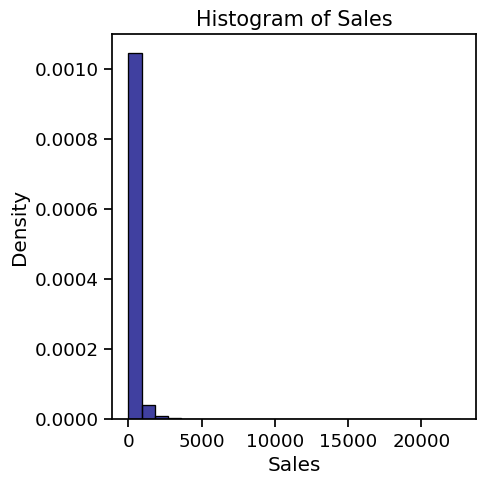

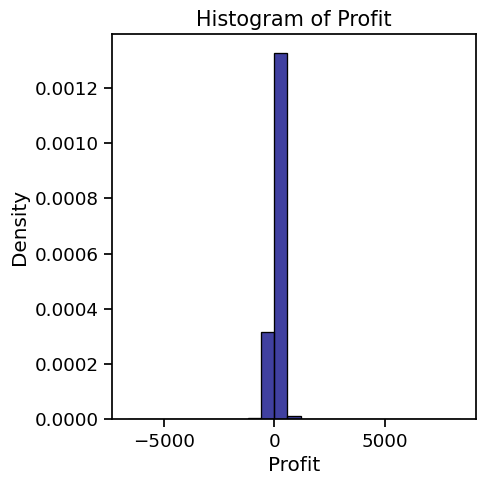

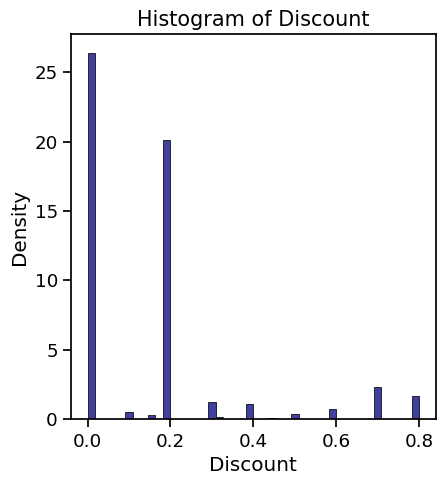

In [8]:
# c) comparison of graphs for sales, profit vs discounts and make inference
imp_numerical_cols=['Sales','Profit','Discount']
for i,col in enumerate(imp_numerical_cols):
    text="<center><h3><b  style='color:black'>" + f"Distribution of</b> <b style='color:red'> {col}"+ "</b></h3><hr></center>"
    display(HTML(text))
    plt.figure(figsize=(16,5))
    bins='auto'
    if i in [0,1]:
        bins=25
    plt.subplot(1,3,1)
    sns.histplot(data=df,x=col,stat='density',bins=bins,color='navy')
    plt.title(f'Histogram of {col}',size=15)


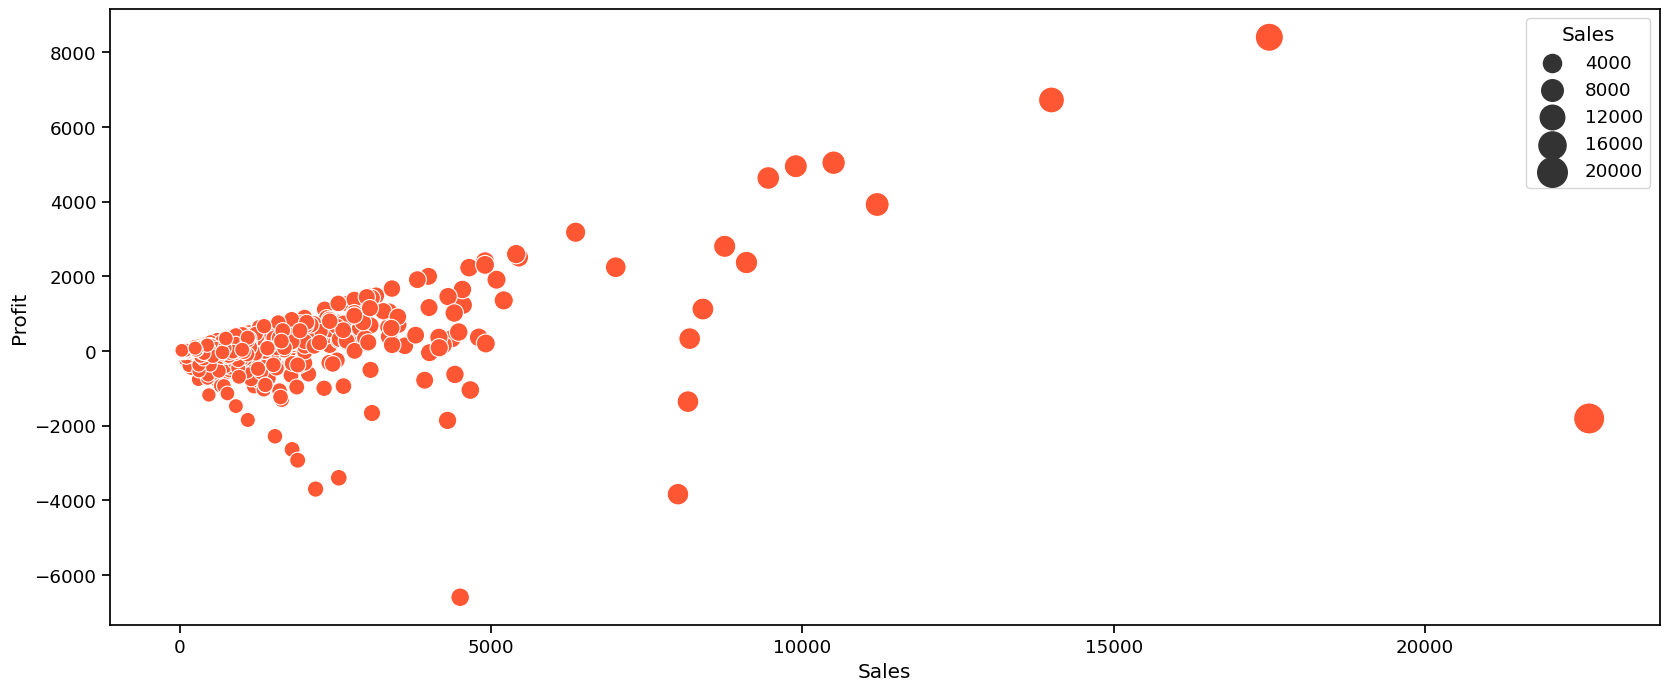

In [16]:
plt.figure(figsize=(20,8))
text="<center><h3><b style='color:red'>Sales </b> <b>vs</b><b style='color:red'> Profit</b>" +  "</b></h3><hr></center>"
display(HTML(text))
sns.scatterplot(data=df,x='Sales',y='Profit',size='Sales',sizes=(100,500),marker='o',color='#FF5733');


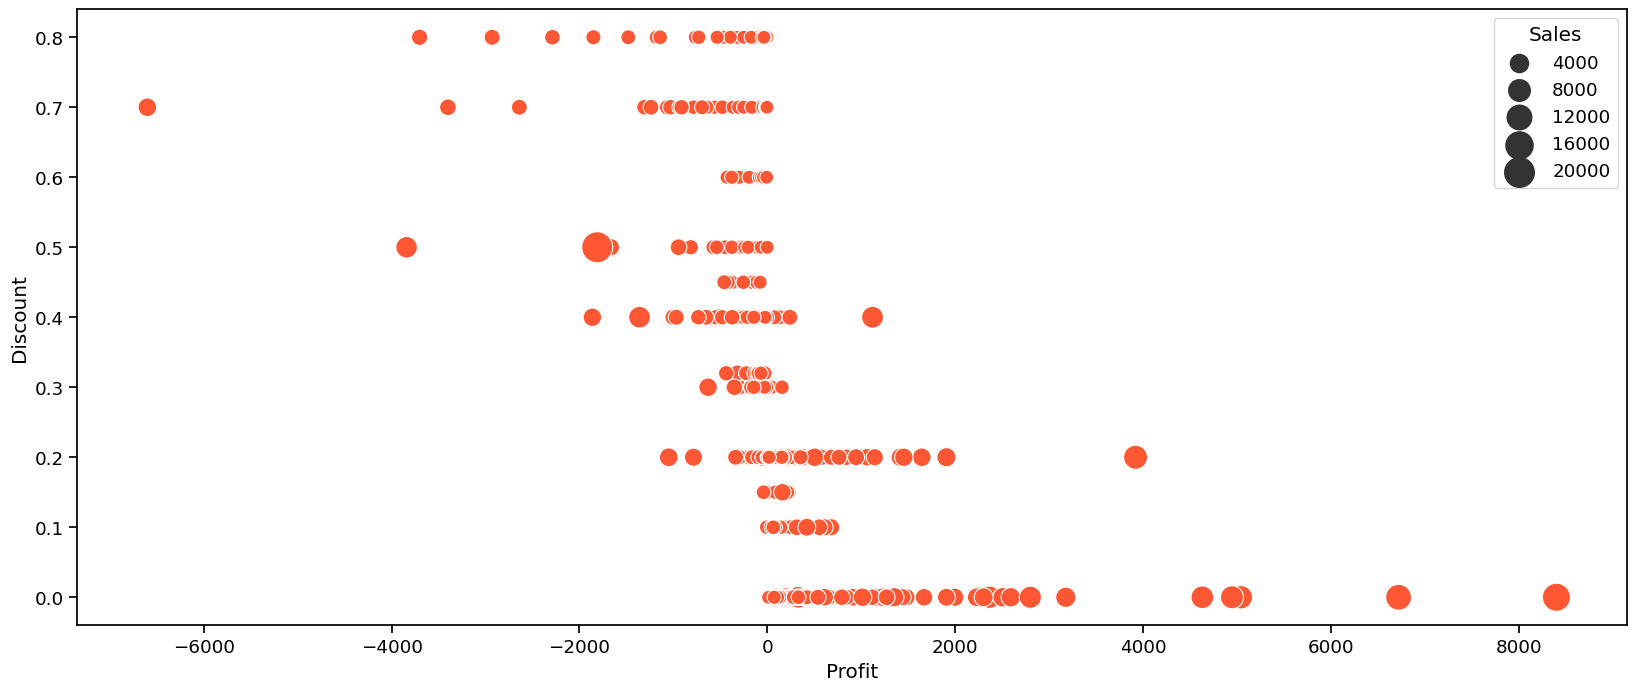

In [17]:
plt.figure(figsize=(20,8))
text="<center><h3><b style='color:red'>Profit </b> <b>vs</b><b style='color:red'> Discount</b>" +  "</b></h3><hr></center>"
display(HTML(text))
sns.scatterplot(data=df,x='Profit',y='Discount',size='Sales',sizes=(100,500),marker='o',color='#FF5733');


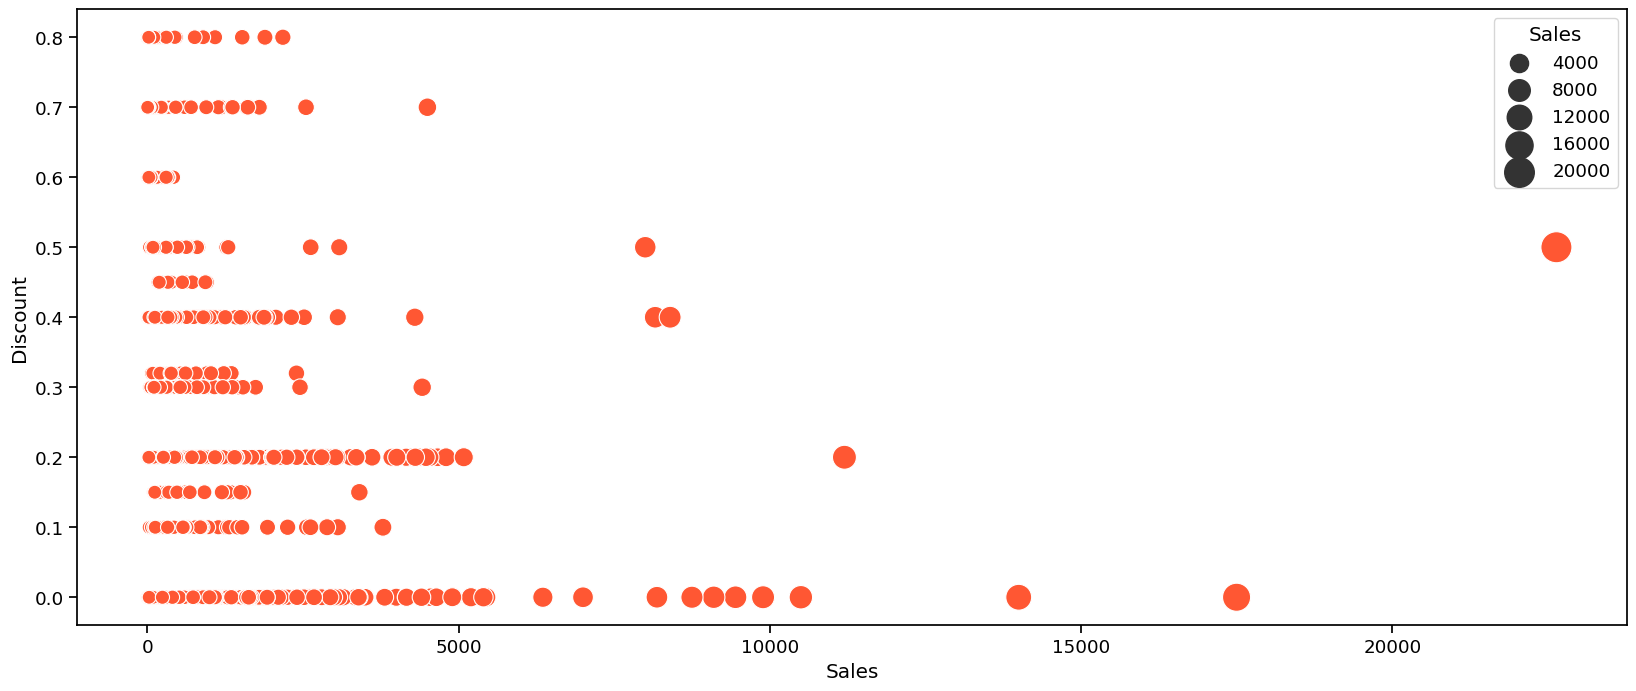

In [18]:
plt.figure(figsize=(20,8))
text="<center><h3><b style='color:red'>Sales </b> <b>vs</b><b style='color:red'> Discount</b>" +  "</b></h3><hr></center>"
display(HTML(text))
sns.scatterplot(data=df,x='Sales',y='Discount',size='Sales',sizes=(100,500),marker='o',color='#FF5733');


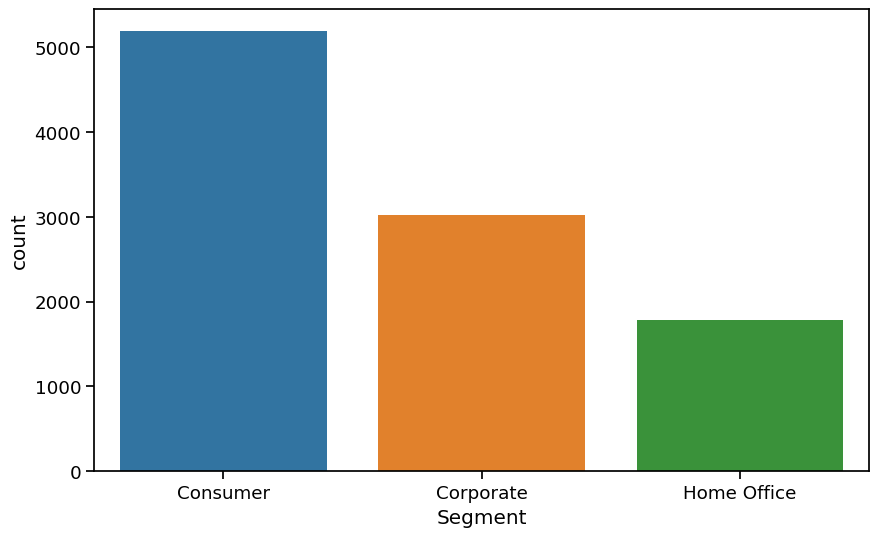

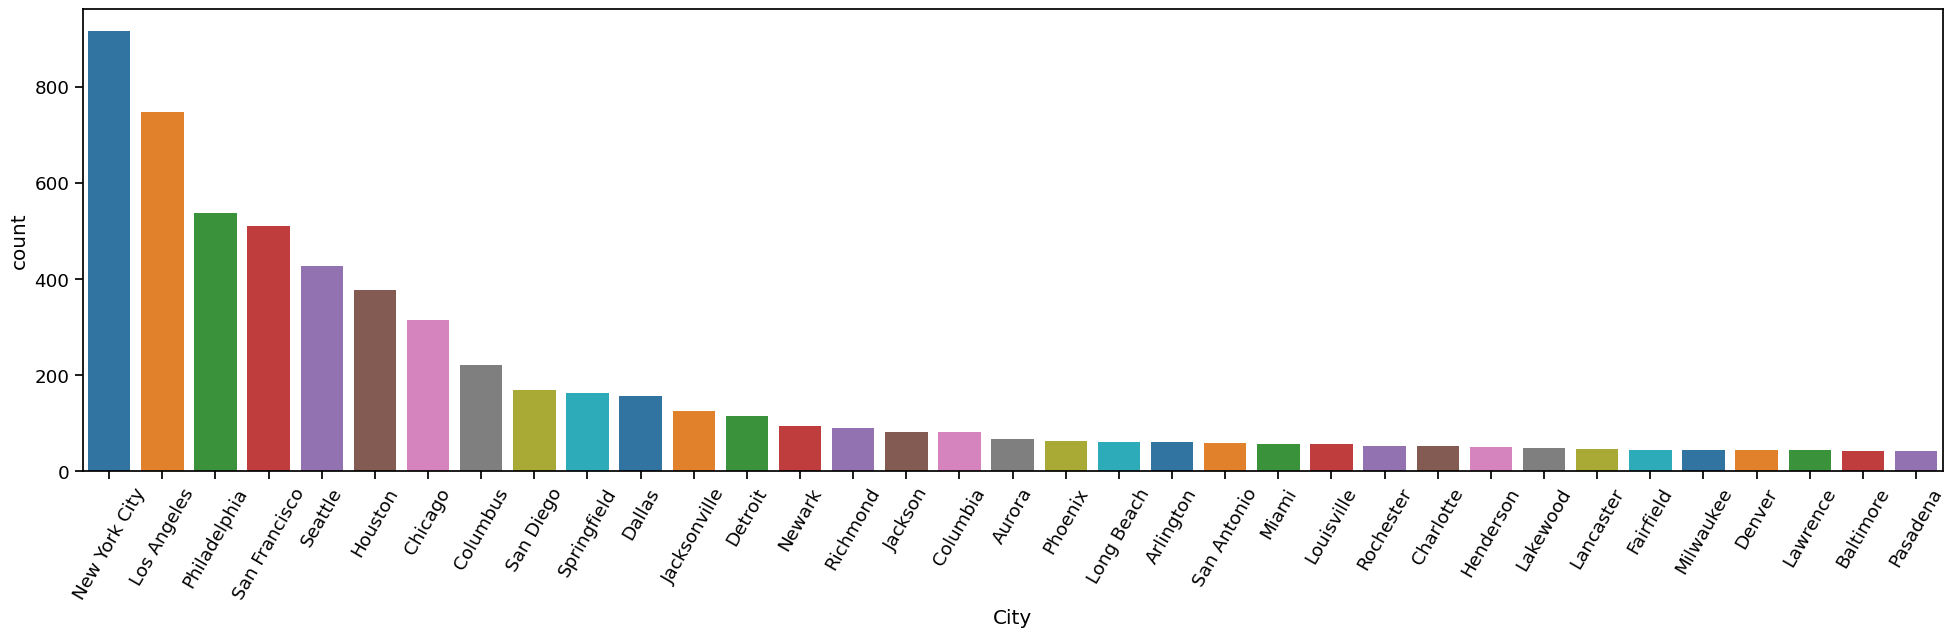

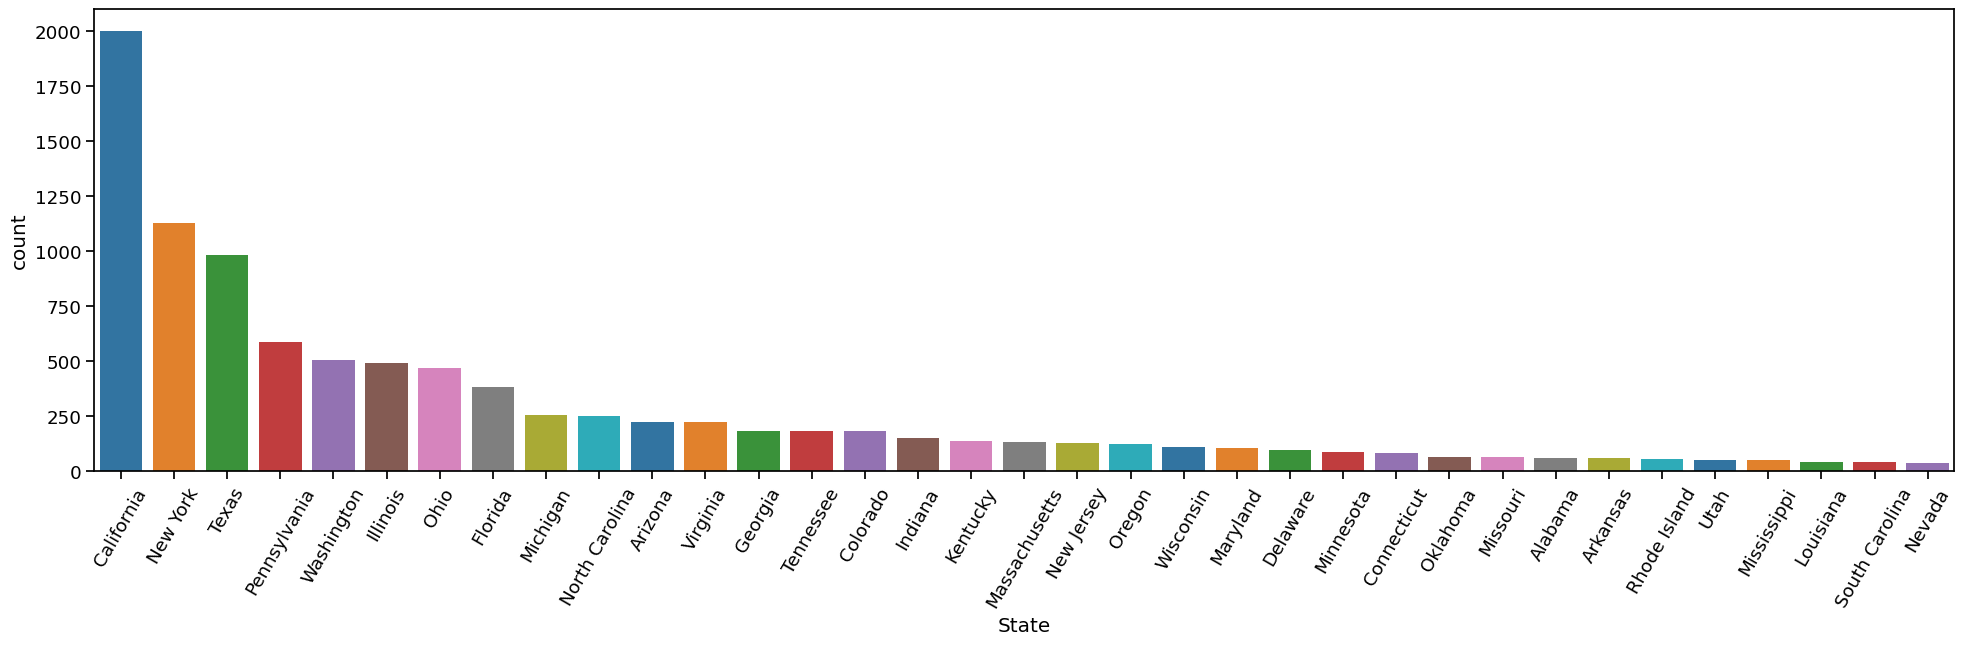

In [21]:
#d) Graphs for maximum sales city, state, segment and make inference
imp_categotical_features=['Segment', 'City', 'State']

for col in imp_categotical_features:
    width=10
    n=len(df[col].unique())
    if n > 15:
        width=24
        plt.figure(figsize=(width,6))
        temp=pd.DataFrame(df[col].value_counts().sort_values(ascending=False)[:35],columns=[col])
        text="<center><h3 ><b style='color:black'>" + f"Distribution of</b> <b style='color:red'> {col}"+ "</b></h3><hr></center>"
        display(HTML(text))
        sns.barplot(data=temp,x=temp.index,y=col,palette='tab10')
        plt.ylabel("count")
        plt.xlabel(col)
        plt.xticks(rotation=60)   
    else:
        plt.figure(figsize=(width,6))
        sns.countplot(data=df,x=col,palette='tab10')
        text="<h3 ><b style='color:black'>" + f"Distribution of</b> <b style='color:red'> {col}"+ "</b></h3><hr>"
        display(HTML(text))
    plt.show()
           

In [ ]:
#segment: Most of the customers are from the Consumer segment.
#City: Among all the cities New York City records the maximum purchases made followed by Los Angeles.
#Region: Among all the states New California records the maximum purchases made followed New York.